In [17]:
# a. Import necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


In [18]:
train_dir = r"C:\Users\Sohel\Downloads\mnist-jpg\mnist-jpg\train"
test_dir = r"C:\Users\Sohel\Downloads\mnist-jpg\mnist-jpg\test"


In [4]:
# b. Load the training and testing data from local folders

img_height, img_width = 28, 28
batch_size = 32


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    color_mode="grayscale",   # MNIST images are grayscale
    batch_size=batch_size,
    label_mode="int",
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    label_mode="int",
    shuffle=False
)

Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [5]:

# Normalize pixel values to [0, 1]
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize_img)
test_ds = test_ds.map(normalize_img)

In [6]:
# Convert labels to one-hot encoding
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=10)))
test_ds = test_ds.map(lambda x, y: (x, tf.one_hot(y, depth=10)))


In [7]:
# c. Define the network architecture
model = Sequential([
    Input(shape=(28,28,1)),         # 1 channel for grayscale
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# d. Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 159s 85ms/step - loss: 0.6949 - accuracy: 0.8137 - val_loss: 0.3241 - val_accuracy: 0.9075
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3009 - accuracy: 0.9138 - val_loss: 0.2542 - val_accuracy: 0.9251
Epoch 3/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2462 - accuracy: 0.9293 - val_loss: 0.2185 - val_accuracy: 0.9340
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2121 - accuracy: 0.9391 - val_loss: 0.1968 - val_accuracy: 0.9401
Epoch 5/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1872 - accuracy: 0.9461 - val_loss: 0.1787 - val_accuracy: 0.9454
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1683 - accuracy: 0.9517 - val_loss: 0.1602 - val_accuracy: 0.9520
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1524 - accuracy: 0.9565 - val_loss: 0.1453 - val_

In [9]:
# e. Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


313/313 [==============================] - 2s 6ms/step - loss: 0.0858 - accuracy: 0.9737
Test Loss: 0.0858
Test Accuracy: 0.9737


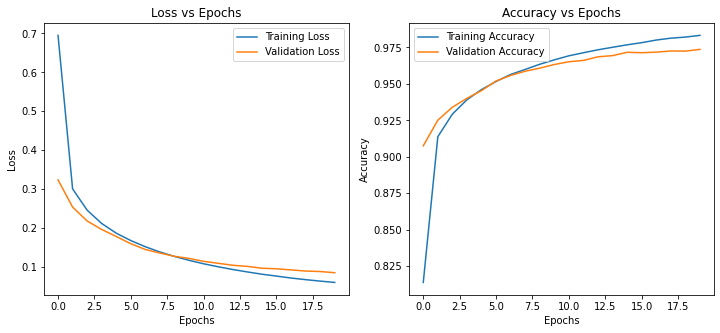

In [10]:
# f. Plot the training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
